In [32]:
import pandas as pd
from cmath import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_path = './data/v1_world-happiness-report-2017.csv'

def read_dataset(path):
    df = pd.read_csv(path)
    return df

In [39]:
def get_transpose_matrix(matrix):
    transpose = [[0] * len(matrix) for _ in range(len(matrix[0]))]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            transpose[j][i] = matrix[i][j]
    return transpose

def get_determinant_matrix(matrix):
    if len(matrix) == 2 and len(matrix[0]) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    det = 0
    for count in range(len(matrix)):
        det += (((-1) ** count) * matrix[0][count] * 
                get_determinant_matrix(
                    [x[:count] + x[count + 1:] for x in matrix[1:]])
                )
    
    return det


def get_inverse_matrix(matrix):
    det = get_determinant_matrix(matrix)
    if det == 0:
        return None
    if len(matrix) != len(matrix[0]):
        return None
    
    if len(matrix) == 2:
        return [
            [matrix[1][1] / det, -1 * matrix[0][1] / det],
            [-1 * matrix[1][0] / det, matrix[0][0] / det]
        ]
    
    inverse = [[0] * len(matrix) for _ in range(len(matrix[0]))]
    for row in range(len(matrix)):
        for col in range(len(matrix)):
            inverse[row][col] += (((-1) ** (row + col)) * 
                                  get_determinant_matrix(
                                      [[matrix[i][j] for j in range(len(matrix)) if j != col]
                                                    for i in range(len(matrix)) if i != row]
                                    )
                                  )
    inverse = get_transpose_matrix(inverse)
    return [
        [y / det for y in row] for row in inverse
    ]

[[2.0, 5.0, -2.0], [-0.0, -4.0, 1.0], [-1.0, -2.0, 1.0]]

In [33]:
def get_linear_regression(dataset, input_cols, output_col):
    dataset = dataset.dropna(subset=input_cols)
    
    x_train, x_test, y_train, y_test = train_test_split(dataset[input_cols], dataset[output_col], test_size= 0.35)
    
    if len(input_cols) == 1:
        x = x_train[input_cols[0]].values 
        y = y_train.values   
        
        w1 = (len(x) * sum(x * y) - sum(x) * sum(y)) / (len(x) * sum(x ** 2) - sum(x) ** 2)
        w0 = (sum(y) - w1 * sum(x)) / len(x)
        
        predictions = [w0 + w1 * value for value in x_test[input_cols[0]].values]
        print(f"Mean squared error: {sum([(a - p) ** 2 for a, p in zip(y_test, predictions)]) / len(predictions)}")
        print(f"Root mean squared error: {sqrt(sum([(a - p) ** 2 for a, p in zip(y_test, predictions)]) / len(predictions))}")
        
        plt.plot(x_test, y_test, 'yo', label = 'Actual')
        plt.plot(x_test, predictions, 'g^', label = "Predicted")
        plt.title('computed validation and real validation data')
        plt.xlabel(", ".join(input_cols))
        plt.ylabel(output_col)
        plt.legend()
        plt.show()
        
        return w0, w1
    
    ww = 
    
    

# Predict happiness based on GDP per Capita

Error: 0.4135696901991254


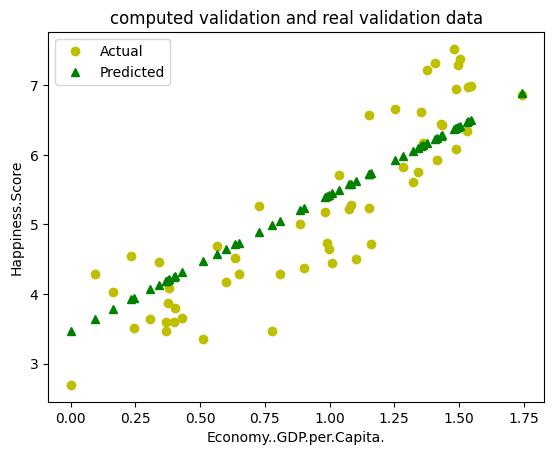

In [18]:
ww0, ww1 = get_linear_regression(read_dataset(dataset_path), ['Economy..GDP.per.Capita.'], 'Happiness.Score')

def run_model():
    gdp_capita = int(input("Enter GDP per Capita: "))    
    print(f"Prediction (GPD per Capita = {gdp_capita}):")
    print(f"Happiness = {ww0 + ww1 * gdp_capita}")
